In [13]:
import numpy as np
import math
from scipy.stats import random_correlation
import matplotlib.pyplot as plt
np.random.seed(0)

In [14]:
T = 1 # time length
N = 252 # number of steps
S_0 = 100 # initial stock price
K = 90 # strike price
r = 0 # expected return rate = risk-free rate in risk-neutral world
M = 3 # number of stocks
# create a random volatilities and a random correlation matrix
sigma = np.random.uniform(0.15, 0.65, M) # volatility
cor = random_correlation.rvs(np.random.dirichlet(np.ones(M)) * M)
print("sigma: \n", sigma)
print("correlation matrix: \n", cor)

sigma: 
 [0.42440675 0.50759468 0.45138169]
correlation matrix: 
 [[1.         0.00873408 0.11894217]
 [0.00873408 1.         0.28344533]
 [0.11894217 0.28344533 1.        ]]


## 1. Simulate Corrolated Brownian Motions

### Generate N correlated normal random variables
#### Procedure

1. Let C be the covariance matrix
2. Apply Cholesky decomposition => $C = LL^T$
3. Generate n independent random variables $x_i \sim \mathcal{N}(0, 1)$
4. $z = Lx$


#### References: 
1. https://www.youtube.com/watch?v=QCqsJVS8p5A&ab_channel=AdrianLiu
2. https://en.wikipedia.org/wiki/Cholesky_decomposition#Positive_semidefinite_matrices
3. Hull, J. (2018). Options, futures, and other derivatives (10th ed.). Pearson. (pg. 472)

In [15]:
def simulate_corrolated_BMS(T, N, M, cor):
    # T: time length (positive integer)
    # N: number of steps (positive integer)
    # m: number of motions
    # cor: correlation matrix
    mean = np.zeros(M)
    x = np.random.multivariate_normal(mean, cor, N)
    x = np.concatenate((np.zeros((1, M)), x), axis = 0)
    return np.sqrt(T / N) * np.cumsum(x, 0)

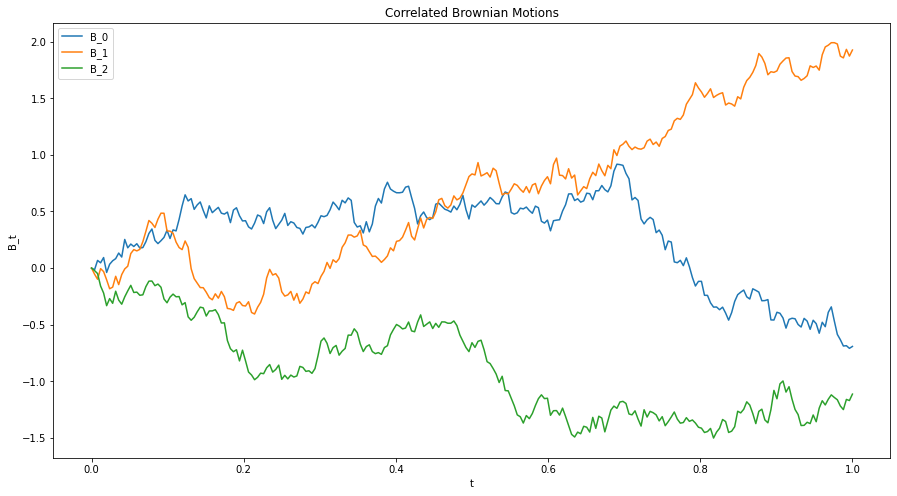

In [16]:
B = simulate_corrolated_BMS(T, N, M, cor)
t = np.linspace(0, T, N + 1)
plt.figure(figsize=(15,8))
plt.plot(t, B)
plt.ylabel("B_t")
plt.xlabel("t")
plt.title("Correlated Brownian Motions")
if (M < 7):
    plt.legend(["B_" + str(x) for x in range(M)])

## 1a. Long-term Corrolated Brownian Motions??

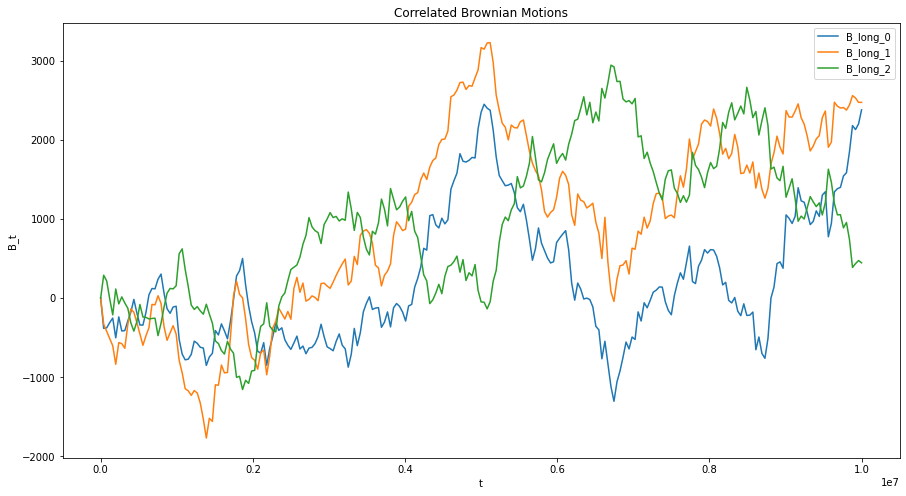

In [271]:
B_long = simulate_corrolated_BMS(10000000, N, 3, [[1, 0.8, -0.8], [0.8, 1, -0.6], [-0.8, -0.6, 1]])
t_long = np.linspace(0, 10000000, N + 1)
plt.figure(figsize=(15,8))
plt.plot(t_long, B_long)
plt.ylabel("B_t")
plt.xlabel("t")
plt.title("Correlated Brownian Motions")
if (M < 7):
    plt.legend(["B_long_" + str(x) for x in range(M)])

## 2. Simulate Correlated Stock Prices using Geometric Brownian Motion

$S_t = S_0 \exp{((r - \sigma^2 / 2) t + \sigma B_t)}$

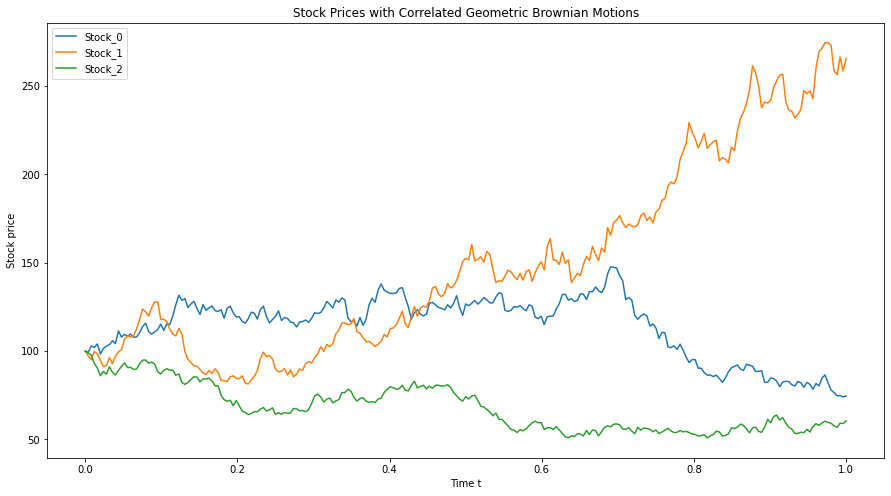

In [17]:
S = np.zeros(np.shape(B))
for x in range(len(B[0])):
    S[:, x] = S_0 * np.exp((r - 1 / 2 * sigma[x] ** 2) * t[x] + sigma[x] * B[:, x])
plt.figure(figsize=(15,8))
plt.plot(t, S)
plt.ylabel("Stock price")
plt.xlabel("Time t")
plt.title("Stock Prices with Correlated Geometric Brownian Motions")
if (M < 7):
    plt.legend(["Stock_" + str(x) for x in range(M)])